In [264]:
#Importing the libraries
import pandas as pd 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [265]:
#Importing the file
d = pd.read_csv("Desktop/CCGENERAL.csv", sep=",",encoding = "ISO-8859-1")

In [266]:
#Getting the first 6 rows of data
d.head()

#displays us the first 6 rows of data with all the columns

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [267]:
#Getting the last 6 rows of data
d.tail()

#displays us the last 6 rows of data with all the columns

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [268]:
#Dimension of the dataset
d.shape

#there are 8950 rows and 18 columns in this dataset

(8950, 18)

In [269]:
#Getting the size of the dataset
d.size

#Returns size of dataframe which is equivalent to total number of elements (rows x columns)

161100

In [270]:
#Calculating the variance of the dataset
d.var()

BALANCE                             4.332775e+06
BALANCE_FREQUENCY                   5.612351e-02
PURCHASES                           4.565208e+06
ONEOFF_PURCHASES                    2.755228e+06
INSTALLMENTS_PURCHASES              8.178274e+05
CASH_ADVANCE                        4.398096e+06
PURCHASES_FREQUENCY                 1.610985e-01
ONEOFF_PURCHASES_FREQUENCY          8.900441e-02
PURCHASES_INSTALLMENTS_FREQUENCY    1.579647e-01
CASH_ADVANCE_FREQUENCY              4.004857e-02
CASH_ADVANCE_TRX                    4.657580e+01
PURCHASES_TRX                       6.179027e+02
CREDIT_LIMIT                        1.324098e+07
PAYMENTS                            8.381394e+06
MINIMUM_PAYMENTS                    5.628503e+06
PRC_FULL_PAYMENT                    8.555578e-02
TENURE                              1.791129e+00
dtype: float64

In [271]:
#Checking if there are any missing values
d.isnull().values.any()

#the output indicates that not every column is filled with values

True

In [272]:
#Getting the number of missing values in each column
CCGENERAL = pd.read_csv("Desktop/CCGENERAL.csv",encoding = "ISO-8859-1")
null_columns=CCGENERAL.columns[CCGENERAL.isnull().any()]
CCGENERAL[null_columns].isnull().sum()

#the output below shows us the number of missing values in each column, for example in "CREDIT_LIMIT" there is only 1 missing value

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

In [273]:
#Checking which rows have missing values for the CREDIT_LIMIT column specifically
CCGENERAL[CCGENERAL["CREDIT_LIMIT"].isnull()][null_columns]

#only row 5203 has a missing value for CREDIT_LIMIT

,CREDIT_LIMIT,MINIMUM_PAYMENTS
5203,NaN,14.418723


In [274]:
#Checking the first 6 columns of missing data
CCGENERAL[CCGENERAL.isnull().any(axis=1)][null_columns].head()

#missing values start from row number 3, meaning there are not any missing values for the first 2 rows

,CREDIT_LIMIT,MINIMUM_PAYMENTS
3,7500.0,NaN
45,2400.0,NaN
47,4200.0,NaN
54,1000.0,NaN
55,6000.0,NaN


In [275]:
#Checking for basic statistic for the dataset
d.describe()

#the output displays the basic statistics (count, mean, std, etc.) for each column
#25th Percentile, which is the end of the first quartile, the 50th Percentile which is the end of the second quartile (or the median) and the 75th Percentile, which is the end of the third quartile. 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [276]:
#Checking for basic statistic for the column CREDIT_LIMIT
d["CREDIT_LIMIT"].describe()

#the output displays the basic statistics for only the column "CREDIT_LIMIT"

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [277]:
#Getting the values for the column CREDIT_LIMIT
print(d['CREDIT_LIMIT'].value_counts())

#all the values in the column "CREDIT_LIMIT" is printed

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
4000.000000     506
6000.000000     463
5000.000000     389
2000.000000     371
7500.000000     277
7000.000000     274
4500.000000     244
6500.000000     211
1800.000000     202
3500.000000     192
9000.000000     183
8000.000000     157
10000.000000    154
8500.000000     153
500.000000      121
5500.000000     116
9500.000000      97
12000.000000     93
10500.000000     91
1700.000000      90
11500.000000     67
11000.000000     55
13000.000000     53
1600.000000      44
2700.000000      43
               ... 
5550.000000       1
1550.000000       1
2050.000000       1
13450.000000      1
25000.000000      1
7800.000000       1
5181.818182       1
13550.000000      1
2550.000000       1
8954.545455       1
9600.000000       1
4650.000000       1
2850.000000       1
11100.000000      1
1120.000000       1
9400.000000       1
13600.000000      1
2450.000000       1
12300.000000      1


In [278]:
#Printing the names of all the columns
print(d.columns.values)

['CUST_ID' 'BALANCE' 'BALANCE_FREQUENCY' 'PURCHASES' 'ONEOFF_PURCHASES'
 'INSTALLMENTS_PURCHASES' 'CASH_ADVANCE' 'PURCHASES_FREQUENCY'
 'ONEOFF_PURCHASES_FREQUENCY' 'PURCHASES_INSTALLMENTS_FREQUENCY'
 'CASH_ADVANCE_FREQUENCY' 'CASH_ADVANCE_TRX' 'PURCHASES_TRX'
 'CREDIT_LIMIT' 'PAYMENTS' 'MINIMUM_PAYMENTS' 'PRC_FULL_PAYMENT' 'TENURE']


In [279]:
#Getting details about the types of columns
d.info()

#the output tells us about the types of columns: int, object, float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [280]:
#Displaying all the variables in the column CUST_ID
print(d.CUST_ID.to_string(index=False))

C10001
C10002
C10003
C10004
C10005
C10006
C10007
C10008
C10009
C10010
C10011
C10012
C10013
C10014
C10015
C10016
C10017
C10018
C10019
C10020
C10021
C10022
C10023
C10024
C10025
C10026
C10027
C10028
C10029
C10030
C10031
C10032
C10033
C10034
C10035
C10036
C10037
C10038
C10039
C10040
C10041
C10043
C10044
C10045
C10046
C10047
C10048
C10049
C10050
C10051
C10052
C10053
C10054
C10055
C10056
C10057
C10058
C10059
C10060
C10061
C10062
C10063
C10064
C10065
C10067
C10068
C10069
C10070
C10071
C10072
C10073
C10074
C10075
C10077
C10078
C10079
C10080
C10081
C10082
C10083
C10084
C10085
C10086
C10087
C10088
C10089
C10090
C10092
C10093
C10094
C10095
C10096
C10097
C10098
C10099
C10100
C10101
C10102
C10103
C10104
C10105
C10106
C10107
C10108
C10109
C10110
C10111
C10112
C10113
C10114
C10115
C10116
C10117
C10118
C10119
C10120
C10121
C10122
C10123
C10124
C10125
C10126
C10127
C10128
C10130
C10131
C10132
C10133
C10134
C10135
C10136
C10137
C10138
C10139
C10140
C10141
C10142
C10143
C10144
C10145
C10146
C10147
C10148

In [281]:
#Data cleaning
#d =d.drop(['CUST_ID'], axis=1)

In [282]:
d.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [283]:
#Checking the first 6 columns of missing data
CCGENERAL[CCGENERAL.isnull().any(axis=1)][null_columns].head()

#the first missing value starts from row number 3 in MINIMUM_PAYMENTS column

,CREDIT_LIMIT,MINIMUM_PAYMENTS
3,7500.0,NaN
45,2400.0,NaN
47,4200.0,NaN
54,1000.0,NaN
55,6000.0,NaN


In [284]:
#Filling missing values with the mean values
d.fillna(d.mean(), inplace=True)
d.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [285]:
#Checking if there are any missing values
d.isnull().values.any()

#the output tells us there are not any missing values left in our dataset

False

In [286]:
print(d.dtypes)

#again checking for the types of columns

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [287]:
#Displaying all the variables in the column CREDIT_LIMIT
print(d.CREDIT_LIMIT.to_string(index=False))

1000.000000
 7000.000000
 7500.000000
 7500.000000
 1200.000000
 1800.000000
13500.000000
 2300.000000
 7000.000000
11000.000000
 1200.000000
 2000.000000
 3000.000000
 7500.000000
 3000.000000
 8000.000000
 3000.000000
 2500.000000
13000.000000
 4000.000000
 2000.000000
11250.000000
 1800.000000
 9000.000000
 6000.000000
 3000.000000
 1700.000000
 1000.000000
10500.000000
 6900.000000
13000.000000
 6000.000000
10500.000000
 1200.000000
11000.000000
 1800.000000
 9000.000000
 5000.000000
 9000.000000
 7500.000000
 1800.000000
 3000.000000
 4500.000000
 1500.000000
 8500.000000
 2400.000000
 1700.000000
 4200.000000
 3300.000000
 4000.000000
12000.000000
 2500.000000
 3500.000000
 3000.000000
 1000.000000
 6000.000000
 4000.000000
 7500.000000
 4000.000000
 6000.000000
 6500.000000
 1600.000000
 4150.000000
 1600.000000
 1850.000000
 1800.000000
 1500.000000
 2500.000000
 6000.000000
 1700.000000
 6250.000000
 7000.000000
 7000.000000
 2250.000000
 6000.000000
 6000.000000
11000.000000


In [288]:
#Detecting outliers
outliers=[]
def detect_outlier(data_1):
    
    threshold=4
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [289]:
#Detecting outliers in column CREDIT_LIMIT
outlier_datapoints = detect_outlier(d["CREDIT_LIMIT"])
print(outlier_datapoints)

#any value above 1400 is considered an outlier

[21500.0, 20000.0, 20000.0, 20000.0, 23000.0, 19500.0, 21000.0, 19500.0, 20000.0, 20000.0, 22500.0, 20000.0, 20000.0, 20000.0, 19500.0, 28000.0, 21500.0, 20500.0, 19600.0, 25000.0, 21000.0, 22000.0, 19500.0, 30000.0, 20000.0, 23000.0, 20000.0, 19500.0, 30000.0]


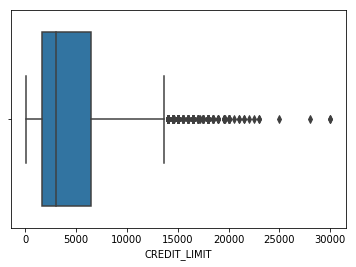

In [290]:
#Detecting outliers with boxplot
import seaborn as sns
sns.boxplot(x=d['CREDIT_LIMIT'])

#the boxplot displays the outlier values visually, any value above 1400 is counted as an outlier

In [291]:
d.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


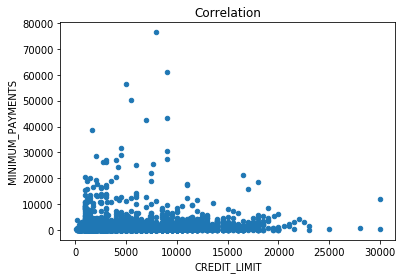

In [292]:
#Data Visualization
d.plot.scatter(x='CREDIT_LIMIT', y='MINIMUM_PAYMENTS', title='Correlation')

#there is a positive correlation between CREDIT_LIMIT and MINIMUM_PAYMENTS, lower the credit limit, lower the minimum payments

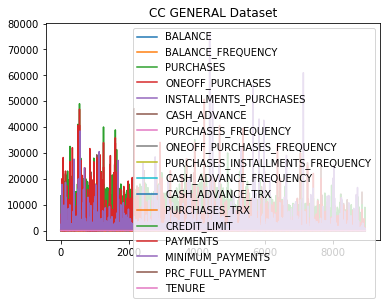

In [293]:
#Data Visualization
d.plot.line(title='CC GENERAL Dataset')

#plotting all the columns under CC General dataset

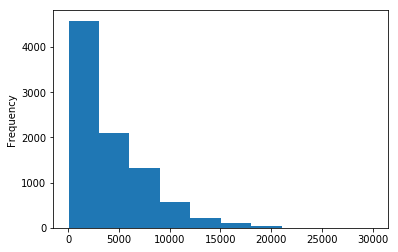

In [294]:
#Data Visualization
d['CREDIT_LIMIT'].plot.hist()

#plotting the values for the column "CREDIT_LIMIT", the majority of the values are between 0-5000

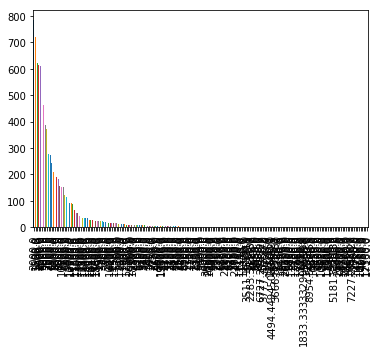

In [295]:
d['CREDIT_LIMIT'].value_counts().plot.bar()

#plotting the values for the column "CREDIT_LIMIT", the majority of the values are earlier in the spectrum

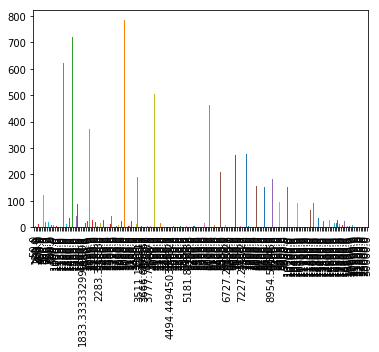

In [296]:
d['CREDIT_LIMIT'].value_counts().sort_index().plot.bar()

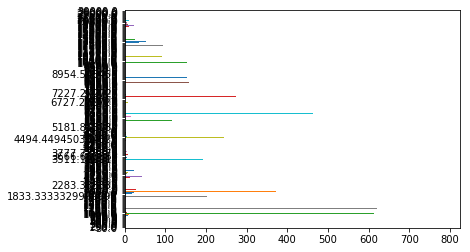

In [297]:
d['CREDIT_LIMIT'].value_counts().sort_index().plot.barh()

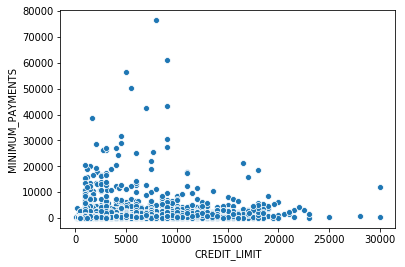

In [298]:
sns.scatterplot(x='CREDIT_LIMIT', y='MINIMUM_PAYMENTS', data=d)

#seaborn scatterplot showing us the correlation between credit limit and minimum payments
#there is a positive correlation between CREDIT_LIMIT and MINIMUM_PAYMENTS, lower the credit limit, lower the minimum payments

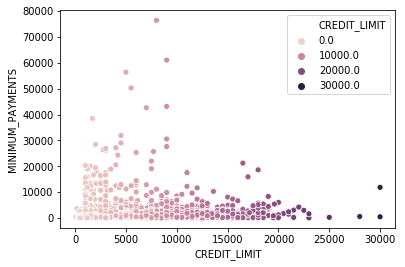

In [299]:
sns.scatterplot(x='CREDIT_LIMIT', y='MINIMUM_PAYMENTS', hue='CREDIT_LIMIT', data=d)
#the hue parameter determines which column in the data frame should be used for colour encoding
#there is a positive correlation between CREDIT_LIMIT and MINIMUM_PAYMENTS, lower the credit limit, lower the minimum payments

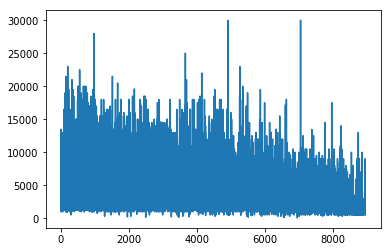

In [300]:
sns.lineplot(data=d['CREDIT_LIMIT'])

#seaborn lineplot displays the values for the column "CREDIT_LIMIT"

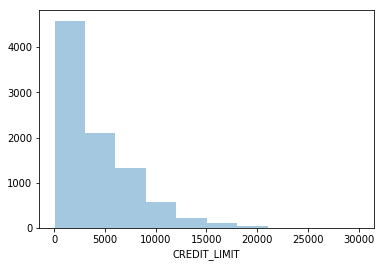

In [301]:
sns.distplot(d['CREDIT_LIMIT'], bins=10, kde=False)

#seaborn distplot shows the values for the column "CREDIT_LIMIT"
#the majority of the values are between 0-5000

/Users/selinkucukoglu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


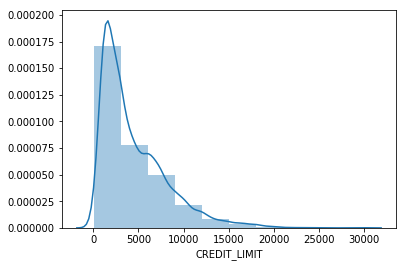

In [302]:
sns.distplot(d['CREDIT_LIMIT'], bins=10, kde=True)

#Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. (https://www.tutorialspoint.com/seaborn/seaborn_kernel_density_estimates)

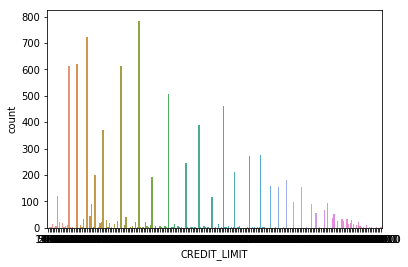

In [303]:
sns.countplot(d['CREDIT_LIMIT'])

#seaborn countplot displaying the values for the column "CREDIT_LIMIT"
#the majority of the values are between 0-5000

In [304]:
#Principal Component Analysis
#Step 1: Standardize the Data
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT', 'TENURE']
# Separating out the features
x = d.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

#PCA is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. (DataCamp)
#PCA is effected by scale so you need to scale the features in your data before applying PCA (Towards Data Science)

In [305]:
x

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [306]:
#PCA projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [307]:
finalDf = pd.concat([principalDf, d[['CUST_ID']]], axis = 1)
finalDf

,principal component 1,principal component 2,CUST_ID
0,-1.682221,-1.076451,C10001
1,-1.138298,2.506465,C10002
2,0.969682,-0.383534,C10003
3,-0.873630,0.043156,C10004
4,-1.599433,-0.688576,C10005
5,0.251292,-0.780076,C10006
6,6.352920,-0.692538,C10007
7,0.277103,-1.290725,C10008
8,-0.441745,-0.461850,C10009
9,-0.562511,-0.366363,C10010


In [308]:
principalDf.head(5)

,principal component 1,principal component 2
0,-1.682221,-1.076451
1,-1.138298,2.506465
2,0.969682,-0.383534
3,-0.873630,0.043156
4,-1.599433,-0.688576


In [309]:
finalDf.head(5)

,principal component 1,principal component 2,CUST_ID
0,-1.682221,-1.076451,C10001
1,-1.138298,2.506465,C10002
2,0.969682,-0.383534,C10003
3,-0.873630,0.043156,C10004
4,-1.599433,-0.688576,C10005


In [310]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [311]:
d['CUST_ID'].unique()

array(['C10001', 'C10002', 'C10003', ..., 'C19188', 'C19189', 'C19190'],
      dtype=object)

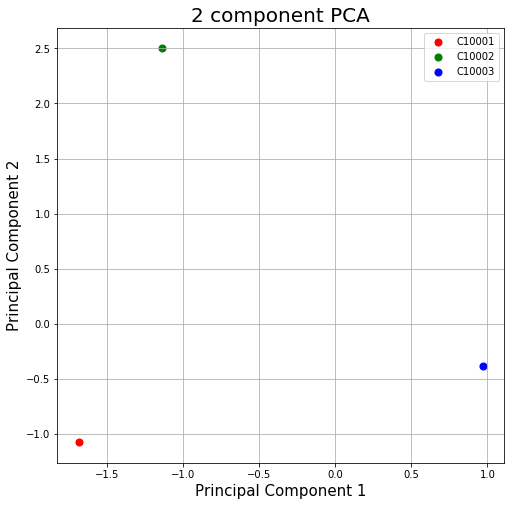

In [312]:
#Visualize 2D projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['C10001', 'C10002', 'C10003', 'C19188', 'C19189', 'C19190']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CUST_ID'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#the graph below shows there is no clustering under the values

In [315]:
pca.explained_variance_ratio_

#The explained variance tells you how much information (variance) can be attributed to each of the principal components. (Towards Data Science)

array([0.27290037, 0.20301991])

In [313]:
d = d.drop(['CUST_ID'], axis=1)

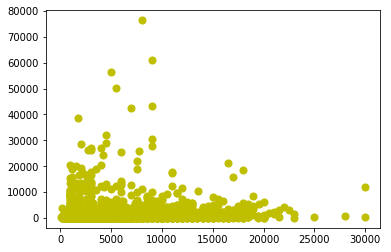

In [316]:
#K-means clustering
plt.scatter(d['CREDIT_LIMIT'], d['MINIMUM_PAYMENTS'], s = 50, c = 'y') #variables you want to plot
plt.show()

#the scatter below shows the correlation between the two columns
#a positive correlation meaning lower the credit limit, lower the minimum payments

In [317]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(d)
data_transformed = mms.transform(d)

/Users/selinkucukoglu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [318]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

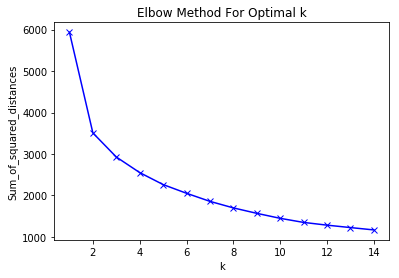

In [319]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#using the elbow method to find the optimal number for k, which is 2

In [321]:
#K means with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(d)
kmeans.cluster_centers_

array([[3.83812438e+03, 9.40216097e-01, 2.36540826e+03, 1.55221632e+03,
        8.13575895e+02, 2.59575856e+03, 5.57775044e-01, 3.46033942e-01,
        4.05748575e-01, 2.27513058e-01, 6.57127992e+00, 2.80145682e+01,
        9.82388374e+03, 4.29021002e+03, 1.76715535e+03, 1.49362515e-01,
        1.17377732e+01],
       [9.42682789e+02, 8.60056582e-01, 6.30672820e+02, 3.29959407e+02,
        3.00990687e+02, 5.36688745e+02, 4.71911465e-01, 1.63192805e-01,
        3.53139648e-01, 1.09883394e-01, 2.34021059e+00, 1.10712863e+01,
        3.03696899e+03, 1.03384374e+03, 6.17270343e+02, 1.54904859e-01,
        1.14570290e+01]])

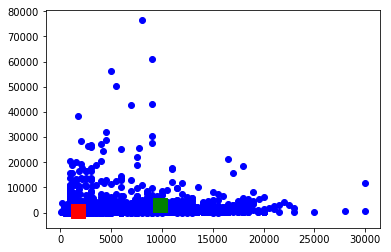

In [323]:
plt.scatter(d['CREDIT_LIMIT'], d['MINIMUM_PAYMENTS'], c = 'b')
plt.scatter(9.81886931e+03 , 3.03641020e+03, s=200, c='g', marker='s')
plt.scatter(1.76586081e+03, 6.17297517e+02, s=200, c='r', marker='s')
plt.show()

#plotting the centroids for the columns "CREDIT_LIMIT" and "MINIMUM_PAYMENTS". Credit limit is marked with green whereas minimum payments is marked with red.

In [162]:
#Mean shift clustering
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [163]:
clusters = [[9.81886931e+03 , 3.03641020e+03,1],[1.76586081e+03, 6.17297517e+02,1],[3.83433613e+03,9.42895957e+02,1]]
X, _ = make_blobs(n_samples = 150, centers = clusters, cluster_std = 0.60)

#generating data

In [164]:
ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_

#store the coordinates for the cluster centers

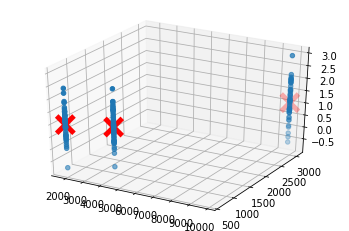

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
plt.show()

#plot the data points and centroids in a 3D graph

In [166]:
#Hierarchical Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [168]:
X = d.iloc[:, [13, 15]].values

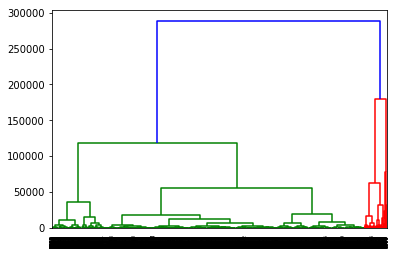

In [169]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

#drawing a dendrogram to find the highest vertical distance that doesn’t intersect with any clusters to find the optimal number of clusters which is 3 in this case

In [324]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

#create an instance of AgglomerativeClustering using the euclidean distance as the measure of distance between points and ward linkage to calculate the proximity of clusters (Towards Data Science)

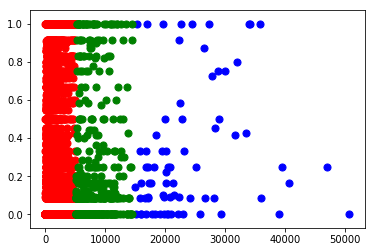

In [325]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

#plotting the different clusters, in blue, green and red